# 07 Estadística-101

Este curso está orientado a personas que quieren reforzar conocimientos de estadísticas básicas aplicadas al análisis de datos voluminosos, de cara a tener una mejor base para futuros procesos de inferencia y otras técnicas analíticas avanzadas.

### Índice

1. Introducción
    * Población
    * Muestras
    * Variables
    * Parámetros
    * Estadígrafos
2. Distribuciones
    * Normal
    * Gamma
3. Teorema del límite central
4. Análisis de umbrales sensibilidad
5. Intervalos de confianza
6. Tamaño muestral
7. Pareto
8. Correlación
9. Regresión lineal
10. Regresión polinomial
11. Clustering



## Librerías  de Python que utilizaremos

In [1]:
import numpy as np # importando numpy
from scipy import stats # importando scipy.stats
import pandas as pd # importando pandas
import math
import matplotlib.pyplot as plt

np.random.seed(1) # para poder replicar el random


### Población
Colección completa de todos los individuos de interés para el investigador.

A continuación mostraremos una población con distribución Normal con media $\mu = 0$ y sigma $\sigma = 1$<br>
Las distribuciones normales representan más del 50% de los fenomenos industriales estudiados, sin embargo, hay otras distribuciones que estudiaremos más adelante.

In [2]:
# Generamos una semilla para que la población que creemos sea siempre la misma
np.random.seed(41)
# Generamos la población con la semilla creada
poblacion = np.random.normal(0, 1.0, 100) 
print(poblacion)

[-0.27071232  0.10484805  0.25052782 -0.92519997  0.56714366 -1.04018022
 -0.15367595  0.78985181 -1.22621585 -0.94800699 -0.56965394 -0.97715021
 -0.77063171 -0.03371129 -1.03285925  1.14242738 -0.60977801  1.46941639
  1.49267884  0.70712523 -1.85849026 -1.37062377 -0.33010639 -1.51528995
  1.20006019 -1.82261914  0.26938454 -0.44642438  1.1143136  -1.3808026
  1.01542452  0.22408128 -0.64455111  0.66153166  1.29296485 -0.89531205
 -0.56831065 -2.11161836 -0.81830772 -0.96238361  0.12450167  0.10850869
 -0.43930126 -0.71356037  0.93418096  0.05865553  1.60971428  0.85990674
 -0.98520304 -0.95836832  0.44910865 -0.94246256  0.15890945  0.38807562
  0.43733776  0.41822955 -0.73218499 -1.42828297 -2.00921735 -0.23343958
  1.80395237 -1.94867066  1.36785101 -1.85873942 -1.23395073 -0.50756976
  1.4071715  -0.94109705  0.87350473  1.13510019  1.1659844   0.04921449
  0.51094674  0.63129939  0.88770207  0.05765164 -0.32954444 -2.83207869
 -1.18255366 -0.05484602  1.24835183  2.51034292 -0.

## Parámetros
Valor que caractariza un aspecto de la población. Ej.: media poblacional, mediana poblacional, desviación estándar poblacional, etc.

In [3]:
print('Media poblacional\t\t= {:4.2f}'.format(poblacion.mean()))
print('Desviación estándar poblacional\t= {:4.2f}'.format(poblacion.std()))
print('Mediana poblacional\t\t= {:4.2f}'.format(np.median(poblacion)))



Media poblacional		= -0.14
Desviación estándar poblacional	= 1.06
Mediana poblacional		= -0.20


## Muestra
Subconjunto de la población, el cual es representativo de la misma.

In [4]:
# Tomemos como muestra los diez últimos elementos de la población
muestra1 = poblacion[90:]
print(muestra1)

[ 1.77387679  0.55578305 -0.54871197  1.08001575 -0.75243358  1.15879497
  0.75087133 -1.26271269 -0.79070053 -0.17078885]


In [5]:
# Ahora tomemos como muestra los diez elementos de forma aleatoria desde la población, en la cual todos 
# tienen la misma probabilidad de ser escogidos
muestra2 = np.random.choice(poblacion, 10)
print(muestra2)

[ 0.10850869 -1.37062377  2.51034292  0.43733776  0.25052782 -0.23343958
  0.56714366 -0.33010639 -0.94109705 -0.56831065]


¿Cuál de las dos muestras (1 ó 2) es la mejor?

Lo anterior es un estilo de muestreo aleatorio simple, el cual, junto con su tamaño, aseguran representatividad, es decir, que la mnuestra sea una imagen confiable de la población. <br>

**Conclusión**<br>
Un buen muestreo aleatorio evita el sesgo muestral, el cual es la tendencia a favorecer la selección de determinados individuos de la población.

### Reflexión
¿Por qué muestrear?<br>
¿Por qué no usar la población completa (el senso) si es que disponemos de él?

## Estadísticos
Medida descriptiva de la muestra que se utiliza para estimar al respectivo parámetro poblacional. El *estadístico* es básicamente lo mismo que el *parámetro poblacional*, pero se diferencia en que se calcula a partir de la muestra y no de la población.

In [6]:
stats.mode([1,2,3,3,3,4,4,4,4,5])[0][0]

4

In [7]:
# Estadísticos de la muestra poblacional aleatoria "muestra2"
estadistico_media = muestra2.mean()

# La desvisción estándar para muestras se denomina "desviación estándar insesgada" ya que se calcula dividiendo
# por (n - 1)
estadistico_std = muestra2.std(ddof=1)
print('Media muestral\t\t\t= {:4.2f}'.format(estadistico_media))
print('Desviación estándar muestral\t= {:4.3f}'.format(estadistico_std))

Media muestral			= 0.04
Desviación estándar muestral	= 1.060


**Observación**<br>
La desviaión estándar muestral se denota con el símbolo: <font color='blue'>$S$</font>  o <font color='blue'>$\widehat{\sigma}$</font>

La media muestral se denota con el símbolo: <font color='blue'>$\overline{X}$</font>  o <font color='blue'>$\widehat{\mu}$</font>


<font color='red'>**** Incluir formula**</font>







## Error muestral
Es la diferencia entre el valor del **parámetro poblacional** y el producido por el **estadístico muestral**.

Se concluye fácilmente que una buena técnica de muestreo reduce el error muestral del estimador.

In [8]:
lista = np.random.normal(3.0, 1.0, 1000000)
dicti = {'a': 1, 'b' : 3}
len(lista)

1000000

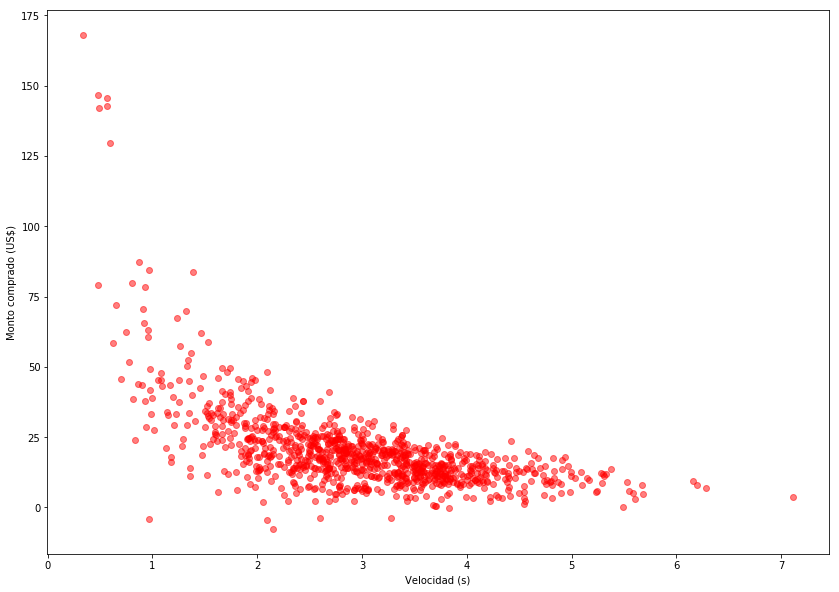

In [9]:
%matplotlib inline
from pylab import *
import numpy as np

plt.figure(figsize =(14, 10))
np.random.seed(2)
pageSpeeds = np.random.normal(3.0, 1.0, 1000)
plt.xlabel('Velocidad (s)')
plt.ylabel('Monto comprado (US$)')
purchaseAmount = np.random.normal(50.0, 20.0, 1000) / pageSpeeds

scatter(pageSpeeds, purchaseAmount, color='r', alpha=0.5)

numpy has a handy polyfit function we can use, to let us construct an nth-degree polynomial model of our data that minimizes squared error. Let's try it with a 4th degree polynomial:

In [ ]:
x = np.array(pageSpeeds)
y = np.array(purchaseAmount)

p1 = np.poly1d(np.polyfit(x, y, 1))

p2 = np.poly1d(np.polyfit(x, y, 2))

p4 = np.poly1d(np.polyfit(x, y, 4))

p5 = np.poly1d(np.polyfit(x, y, 5))

We'll visualize our original scatter plot, together with a plot of our predicted values using the polynomial for page speed times ranging from 0-7 seconds:

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize =(12, 10))
xp = np.linspace(0, 10, 400)
plt.scatter(x, y, c='r',alpha=0.5)
plt.plot(xp, p1(xp), c='b')
plt.show()

Looks pretty good! Let's measure the r-squared error:

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y, p5(x))

print('r2 = {:.3f}'.format(r2))


## Distribuciones estadisticas

### Normal

Las distribuciones normales representan más del 50% de los fenomenos industriales estudiados. Esta distribución es de carácter continuo (no discreta).

Los parámetros de media, mediana y moda en una distribución normal son iguales.

La media corresponde al punto en la curva en el cual la perdiente (primera derivada) es cero, y la desviación estándar corresponde a la diferencia de los valores entre el punto de la media y el punto en la curva en los cuales la pendiente cambia de signo.

A considerar:
* Entre el primer **sigma** ($\sigma$) positivo y el primer **sigma** negativo se encuentra el 68% de los casos.
* Entre el segundo **sigma** positivo y el segundo **sigma** negativo se encuentra el 95,5% de los casos. 
* Entre el tercer **sigma** positivo y el tercer **sigma** negativo se encuentra el 99,73% de los casos.

In [10]:
np.random.seed(1)
# Generamos la población con la semilla creada
normal = np.random.normal(0, 1.0, 1000) 
print(normal)

[ 1.62434536e+00 -6.11756414e-01 -5.28171752e-01 -1.07296862e+00
  8.65407629e-01 -2.30153870e+00  1.74481176e+00 -7.61206901e-01
  3.19039096e-01 -2.49370375e-01  1.46210794e+00 -2.06014071e+00
 -3.22417204e-01 -3.84054355e-01  1.13376944e+00 -1.09989127e+00
 -1.72428208e-01 -8.77858418e-01  4.22137467e-02  5.82815214e-01
 -1.10061918e+00  1.14472371e+00  9.01590721e-01  5.02494339e-01
  9.00855949e-01 -6.83727859e-01 -1.22890226e-01 -9.35769434e-01
 -2.67888080e-01  5.30355467e-01 -6.91660752e-01 -3.96753527e-01
 -6.87172700e-01 -8.45205641e-01 -6.71246131e-01 -1.26645989e-02
 -1.11731035e+00  2.34415698e-01  1.65980218e+00  7.42044161e-01
 -1.91835552e-01 -8.87628964e-01 -7.47158294e-01  1.69245460e+00
  5.08077548e-02 -6.36995647e-01  1.90915485e-01  2.10025514e+00
  1.20158952e-01  6.17203110e-01  3.00170320e-01 -3.52249846e-01
 -1.14251820e+00 -3.49342722e-01 -2.08894233e-01  5.86623191e-01
  8.38983414e-01  9.31102081e-01  2.85587325e-01  8.85141164e-01
 -7.54397941e-01  1.25286

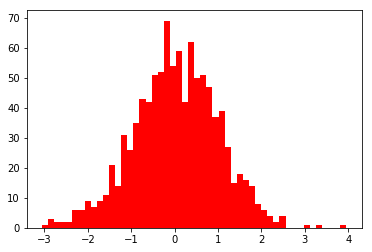

In [11]:
#hagamos un Histograma (gráfica de frecuencias) donde 
#eje X: las clases de la variable estudiada, eje Y: la frecuencia absoluta
plt.hist(normal, 50, color='r')
plt.show()

In [12]:
print('Media poblacional\t\t= {:4.2f}'.format(normal.mean()))
print('Desviación estándar poblacional\t= {:4.2f}'.format(normal.std()))
print('Mediana poblacional\t\t= {:4.2f}'.format(np.median(normal)))

Media poblacional		= 0.04
Desviación estándar poblacional	= 0.98
Mediana poblacional		= 0.04


### Test de Anderson-Darling
Para comprobar si los datos de nuestra población o muestra siguen una distribución **normal**, utilizaremos un test de normalidad denominado **Anderson-Darling**, el cual  evalúa la hipótesis (y su correspondiente hipótesis nula) de que los datos siguen una distribuión normal:

* H$_0$ :: los datos siguen una distribución normal 
* H$_1$ :: los datos NO siguen una distribución normal

Si el valor arrojado (Test estadístico de Anderson-Darling) es menor al valor crítico dado para un cierto nivel de significanci (e.g.: 5%), se acepta la hipótesis H$_0$, i.e., los datos tienen una distribución normal.

In [13]:
stats.anderson(normal, dist='norm')

AndersonResult(statistic=0.37034000708831627, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

<font color='blue'>Conclusión:</font> el resultado del test arroja 0.37, el cual es menor a 0.784 (a nivel de significancia de un 5%), se concluye que los datos tiene una distribución normal.

### Poisson

La distribución **Poisson** se utiliza para contar de forma discreta. Por ejemplo: cantidad de hijos, personas en una fila, camiones entrando a puerto, DPU (defector por unidad), pérdida de maletas por vuelo, etc.

Crearemos una distribución del tipo Poisson aleatoria en la cual se utilizan dos parámetros:

* $\color{red}{\lambda}$ (lambda) :: representa a la media de la población o muestra (e.g.: cantidad de personas promedio que llegana una cola de un banco por unidad de tiempo (hora)
* $\color{red}n$ :: tamaño de la población o muetra según el caso

Nota:
* La media de una distribución Poisson es $\color{red}{\lambda}$
* La desviación estándar es $\color{red}{\sqrt{\lambda}}$

In [14]:
# Generamos los datos aleatorios con semilla (seed) igual 1
lam = 90
size = 100
poisson = np.random.RandomState(seed=1).poisson(lam=lam, size=size)
poisson

array([ 88,  78,  80,  87,  88,  81,  88,  78,  85,  74,  80,  75, 114,
        95,  95,  84,  76, 105,  84,  81,  90,  92,  92,  76,  95,  69,
        95, 110, 105,  78,  87, 107,  97, 103,  97,  83,  88,  95,  77,
        89,  87, 105,  85, 103, 105,  80, 108,  72,  96, 102,  91,  77,
        92,  92,  99,  99, 102,  91,  71,  67,  82,  92,  92,  83,  81,
        82,  93,  79,  72,  93,  92,  91,  95,  72,  94,  97,  83,  81,
        91,  83,  97,  93, 111, 106,  87,  93, 107,  87,  80,  78, 100,
        80,  78,  86,  92,  89,  99,  90,  88,  85])

In [15]:
print('Media poblacional\t\t= {:4.2f}'.format(poisson.mean()))
print('Desviación estándar poblacional\t= {:4.2f}'.format(poisson.std()))
print('Mediana poblacional\t\t= {:4.2f}'.format(np.median(poisson)))
print('Moda poblacional es {} y se repite {} veces'.format(str(stats.mode(poisson)[0][0]),
                                              str(stats.mode(poisson)[1][0])))


Media poblacional		= 89.19
Desviación estándar poblacional	= 10.29
Mediana poblacional		= 89.00
Moda poblacional es 92 y se repite 8 veces


Las **distribuciones Poisson** se comportan como **Normales** cuando su lambda es grande.


In [16]:
stats.anderson(poisson, dist='norm')

AndersonResult(statistic=0.3464057940154106, critical_values=array([0.555, 0.632, 0.759, 0.885, 1.053]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

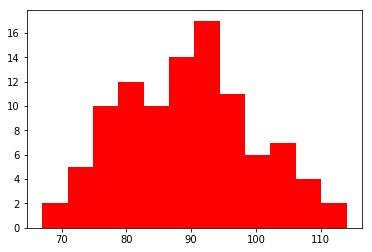

In [17]:
plt.hist(poisson, 12, color='r')
plt.show()

Probemos con una Poisson con un Lambda muy pequeño; por ejemplo 1.2 (e.g.: cantidad de hijos por alumnos en esta clase)

In [18]:
lam = 1.2
size = 1000
poisson2 = np.random.RandomState(seed=1).poisson(lam=lam, size=size)
poisson2

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 2, 3, 0, 0, 1, 2, 1, 2, 3, 1,
       2, 0, 0, 0, 1, 0, 1, 1, 2, 1, 1, 2, 3, 0, 2, 2, 3, 1, 3, 1, 2, 1,
       2, 1, 2, 2, 3, 0, 2, 4, 0, 0, 0, 0, 2, 1, 0, 3, 1, 2, 2, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 1, 3, 2, 0, 0, 0, 1, 1, 2, 2, 0, 0, 1, 0, 1, 0,
       1, 3, 0, 4, 0, 4, 1, 1, 3, 1, 0, 0, 1, 2, 0, 1, 1, 5, 2, 1, 0, 1,
       1, 2, 2, 1, 1, 3, 2, 0, 3, 2, 2, 1, 1, 2, 0, 1, 4, 0, 3, 2, 1, 1,
       1, 1, 3, 0, 1, 0, 1, 2, 0, 0, 2, 0, 2, 0, 0, 1, 0, 2, 0, 1, 2, 1,
       5, 0, 2, 1, 2, 0, 1, 2, 1, 0, 4, 1, 0, 1, 0, 1, 2, 1, 1, 1, 0, 0,
       2, 1, 1, 0, 2, 2, 2, 3, 0, 0, 1, 3, 1, 2, 0, 0, 0, 0, 1, 0, 1, 2,
       1, 2, 0, 1, 1, 1, 4, 0, 0, 4, 2, 0, 0, 1, 0, 1, 1, 1, 2, 2, 2, 1,
       3, 1, 0, 1, 2, 0, 3, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 2, 0, 3, 3, 0,
       0, 1, 1, 4, 1, 1, 2, 0, 0, 1, 1, 1, 2, 1, 2, 0, 2, 2, 2, 3, 2, 2,
       1, 1, 2, 1, 1, 2, 0, 0, 0, 1, 0, 2, 0, 0, 3, 3, 1, 1, 0, 1, 0, 1,
       2, 2, 1, 2, 1, 1, 1, 0, 2, 1, 0, 0, 1, 1, 1,

In [19]:
print('Media poblacional\t\t= {:4.2f}'.format(poisson2.mean()))
print('Desviación estándar poblacional\t= {:4.2f}'.format(poisson2.std()))
print('Mediana poblacional\t\t= {:4.2f}'.format(np.median(poisson2)))
print('Moda poblacional es {} y se repite {} veces'.format(str(stats.mode(poisson2)[0][0]),
                                              str(stats.mode(poisson2)[1][0])))


Media poblacional		= 1.22
Desviación estándar poblacional	= 1.09
Mediana poblacional		= 1.00
Moda poblacional es 1 y se repite 345 veces


In [20]:
stats.anderson(poisson2, dist='norm')

AndersonResult(statistic=47.031543197659175, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

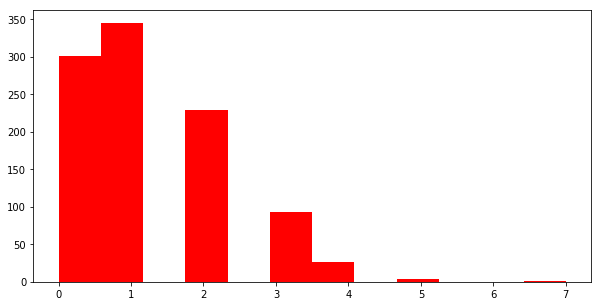

In [81]:
plt.figure(figsize=(10, 5))

plt.hist(poisson2, 12, color='r')
plt.show()

### Gamma

La distribución **Gamma** se utiliza con variables continuas (no discretas) que siguen una forma asimétrica (no normales). Ejemplos de fenómenos que se describen con esta distribución son: tiempo de duración procesos o ciclos productivos, vida útil de baterías y componentes eléctricos, vida de los seres vivos, caducidad de bienes perecibles, tiempo entre llegadas de pedidos de clientes, etc.

Crearemos una distribución del tipo Gamma aleatoria en la cual se utilizan dos parámetros:

* $\color{red} \alpha$ :: representa el parámetro de la forma
* $\color{red} \beta$ :: representa el parámetro de la escala
* $\color{red}n$ :: tamaño de la población o muetra según el caso

Nota:
* La media de una distribución Gamma se calcula $\color{red}{\alpha * \beta}$
* La desviación estándar es $\color{red}{\sqrt{\alpha} * \beta}$


In [24]:
def d_gamma(alfa, beta, n):
    return np.random.RandomState().gamma(alfa, beta, n)

In [47]:
alfa = 1
beta = 3
n = 1000
gamma = d_gamma(alfa, beta, n)

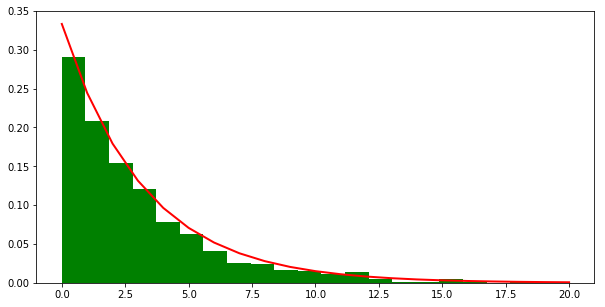

In [80]:
plt.figure(figsize=(10, 5))


count, bins, ignored = plt.hist(gamma, 20, normed=True, color='g')
y = (bins-1)**(alfa-1)*(np.exp(-bins/beta) / (sps.gamma(alfa)*beta**alfa))
plt.plot( y, linewidth=2, color='r')
plt.show()

In [41]:
x = np.linspace(0, 50, num=51)

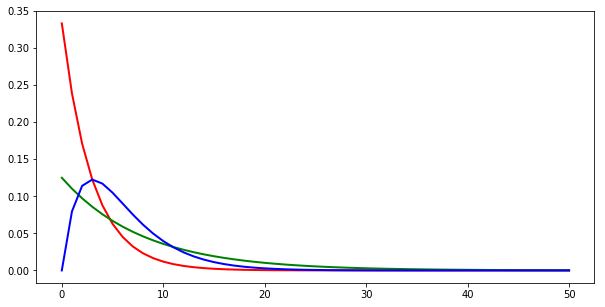

In [79]:
import scipy.special as sps

alfa = 1
beta = 3
alfa2 = 1
beta2 = 8
alfa3 = 2
beta3 = 3
plt.figure(figsize=(10,5))
y = x**(alfa-1)*(np.exp(-x/beta) / (sps.gamma(alfa)*beta**alfa))
plt.plot(x, y, linewidth=2, color='r')

y2 = x**(alfa2-1)*(np.exp(-x/beta2) / (sps.gamma(alfa2)*beta2**alfa2))
plt.plot(x, y2, linewidth=2, color='g')

y3 = x**(alfa3-1)*(np.exp(-x/beta3) / (sps.gamma(alfa3)*beta3**alfa3))
plt.plot(x, y3, linewidth=2, color='b')

plt.show()

## Teorema del límite central


In [73]:
def tlc(población, n_muestras, t_muestra):
    # n_muestras :: Cantidad de muestras a obtener
    # t_muestra :: Tamaño de las muestras
    medias = []
    for i in range(0, n_muestras):
        muestra = np.random.choice(población, t_muestra)
        medias.append(muestra.mean())
    return medias

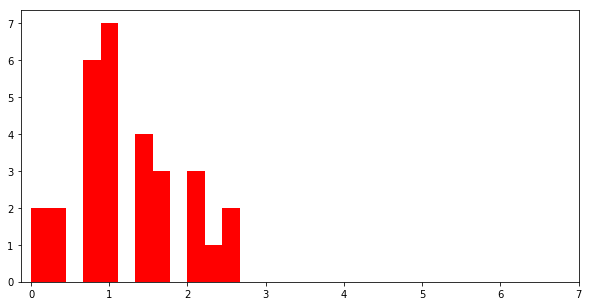

In [78]:
plt.figure(figsize=(10,5))

medias = tlc(poisson2, 30, 3)
plt.hist(medias, 12, color='r')
plt.xticks(range(0,8,1))
plt.show()

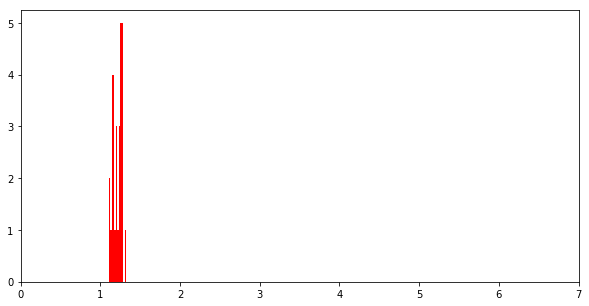

In [77]:
plt.figure(figsize=(10,5))
medias = tlc(poisson2, 30, 305)
plt.hist(medias, 12, color='r')
plt.xticks(range(0,8,1))
plt.show()